In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
with open('../results/revision/corr/precision_24res_apart_jac3.json', 'r') as file:
    precision = json.load(file)
    

#with open('../../../so_jac/precision_24res_apart_jac_full.json', 'r') as file:
#    precision = json.load(file)

In [3]:
len(precision.keys())

1431

In [4]:
precision['3KS6A'].keys()

dict_keys(['msa', 'esm2_jac', 'esm2', 'esmfold'])

In [5]:
def calculate_mean(score_type): 
    count = 0 
    proteins = precision.keys()
    for protein in proteins: 
        count = count + precision[protein][score_type] 
    return count/len(proteins) 

In [6]:
print(calculate_mean('msa'))
print(calculate_mean('esm2'))
print(calculate_mean('esm2_jac'))

0.6747974633937144
0.8717270637372334
0.7578602570135398


In [7]:
def plot_precision(info1, info2, label1, label2, name):
    fig, ax = plt.subplots(figsize=(6, 6)) 
    
    x_values = [protein_data[info1] for protein_data in precision.values()]
    y_values = [protein_data[info2] for protein_data in precision.values()]

    ax.scatter(x_values, y_values)

    ax.set_xlabel(label1, fontsize = 25)
    ax.set_ylabel(label2, fontsize = 25)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.plot([0,1],[0,1])
    
    plt.savefig('../figures_manuscript/revision/corr/' + name)
    plt.show()

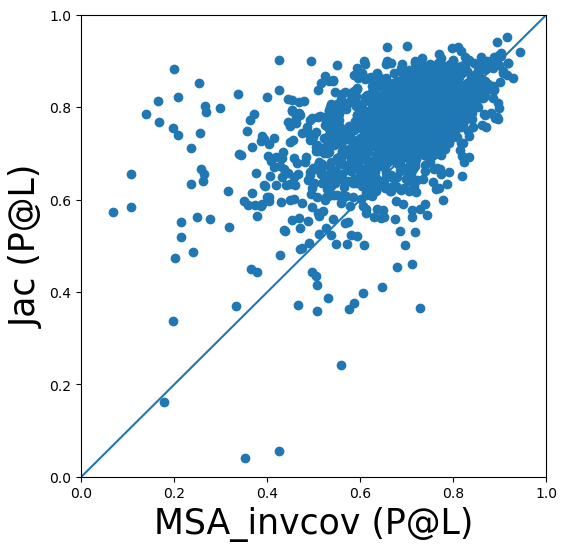

In [8]:
plot_precision('msa', 'esm2_jac', 'MSA_invcov (P@L)', 'Jac (P@L)', 'jacv1_msa_esm2_jac3_precision.svg') 
plt.show()

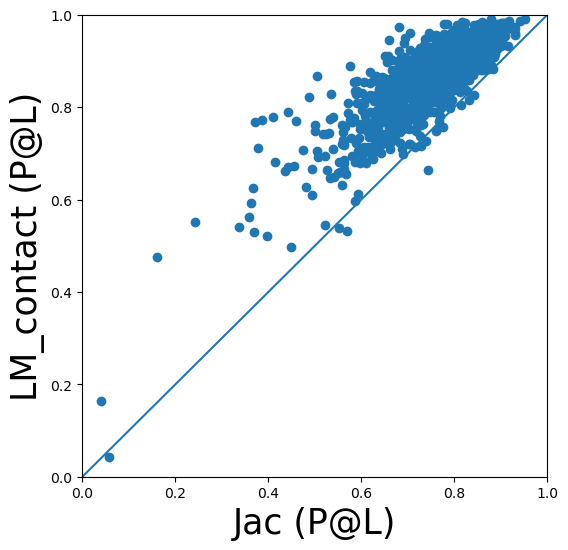

In [9]:
plot_precision('esm2_jac', 'esm2', 'Jac (P@L)', 'LM_contact (P@L)', 'jacv1_jac3_esm2_precision.svg') 
plt.show()

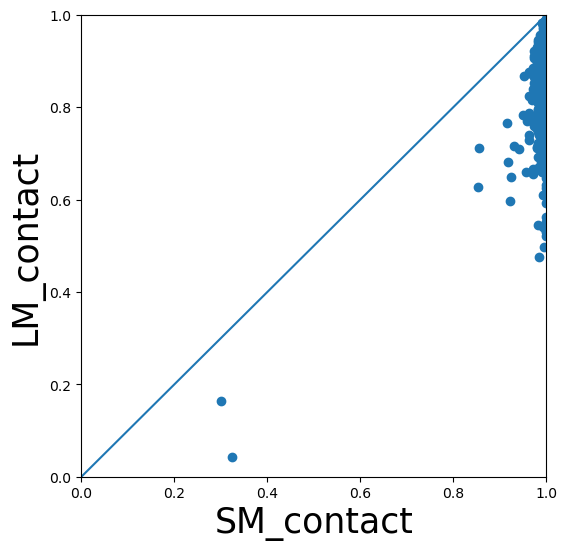

In [10]:
plot_precision('esmfold', 'esm2', 'SM_contact', 'LM_contact', 'jacv3_SM_LM_precision.svg') 